# Foveated vision supplement

This notebook illustrates the effect of eccentricity on acuity.

It is assumed that noise in location estimates increases with eccentricity and that the noise is Gaussian distributed.

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats
import numpy as np

mpl.style.use('fivethirtyeight')

def plot_gaussian(mean,sigma,fmt,label):
    # plot a Gaussian distributed at 'mean' with standard deviation sigma.
    x_min = mean-3*sigma
    x_max = mean+3*sigma
    x = np.linspace(x_min, x_max, 100)
    y = scipy.stats.norm.pdf(x,mean,abs(sigma))
    plt.xlim(-80,80)
    plt.ylim(0,0.2)
    plt.plot(x,y,fmt,label=label)


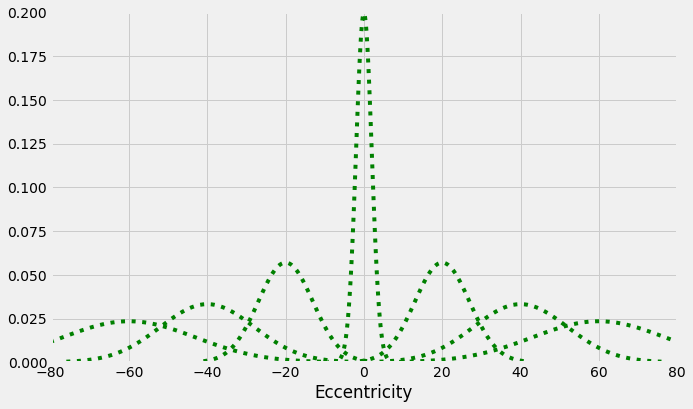

In [2]:
# fixed_noise is the noise at the fovea.
fixed_noise = 2

# the noise parameter determines how much noise increases with eccentricity
noise_parameter = 0.25

eccentricity = np.arange(-60,70,20)
plt.figure(figsize=(10,6))

for i in eccentricity:
    plot_gaussian(i, fixed_noise+abs(noise_parameter*i), 'g:',f'{i}')

x = plt.xlabel('Eccentricity')


In the figure above it is assumed that the gaze is at 0 eccentricity. Each distribution then represents the perceived target location probability given that the actual target location is at the centre of the distribution. 

So, for example, if the target is at eccentricity 60 then the probability of perceiving it at 60 is about 0.025, whereas if the target is at 20 then the probability of perceiving it at 20 is over 0.05.

The figure also illustrates the range of perceived locations at each eccentricity. If the target is at eccentricity 20 then the range of possible perceived locations is between about 0 and 40.

Parameter values do not represent the actual human acuity function and are for illustration only.

## Exercise

* Build a Python model of human vision which returns the (stochastic) perceived location of a target given the true location.

* Assume that the eyes are moved to the perceived location and a new observation is made of the target (which has not moved). Show, through simulated trials, how the error in the perceived location reduces as each successive observation is made.